<a href="https://colab.research.google.com/github/Raniasd/Simple-LinearRegression/blob/main/Simple_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [3]:
df = pd.read_csv('HousingPrices.csv')

In [4]:
df.shape

(1460, 2)

In [5]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [6]:
df.describe()

,SquareFeet,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


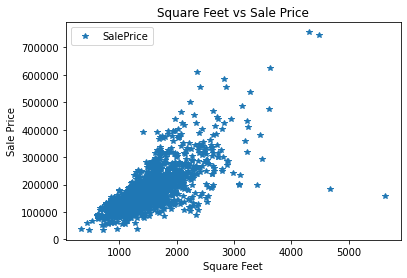

In [7]:
df.plot(x='SquareFeet', y='SalePrice', style='*')
plt.title('Square Feet vs Sale Price')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [11]:
lr = LinearRegression().fit(X_train, y_train)
get_cv_scores(lr)

CV Mean:  0.5147052949885541
STD:  0.06563558755274343




In [12]:
print(lr.intercept_)
print(lr.coef_)

13330.293444921088
[110.26434426]


In [13]:
y_pred = lr.predict(X_test)

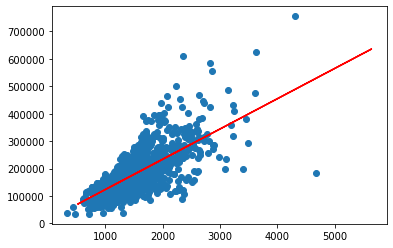

In [14]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,200624,290645.119259
1,133000,187327.428687
2,110000,145978.299590
3,192000,236284.797539
4,88000,133738.957377


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 39364.76724953735
Mean Squared Error: 3913788296.4027987
Root Mean Squared Error: 62560.277304394986
